https://www.kaggle.com/code/rishidamarla/stock-market-prediction-using-decision-tree/notebook

In [ ]:
# Importing all necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Using data from Apple's stock.
df = pd.read_csv('/content/all_stocks_5yr.csv')

In [5]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [7]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [8]:
df.shape

(619040, 7)

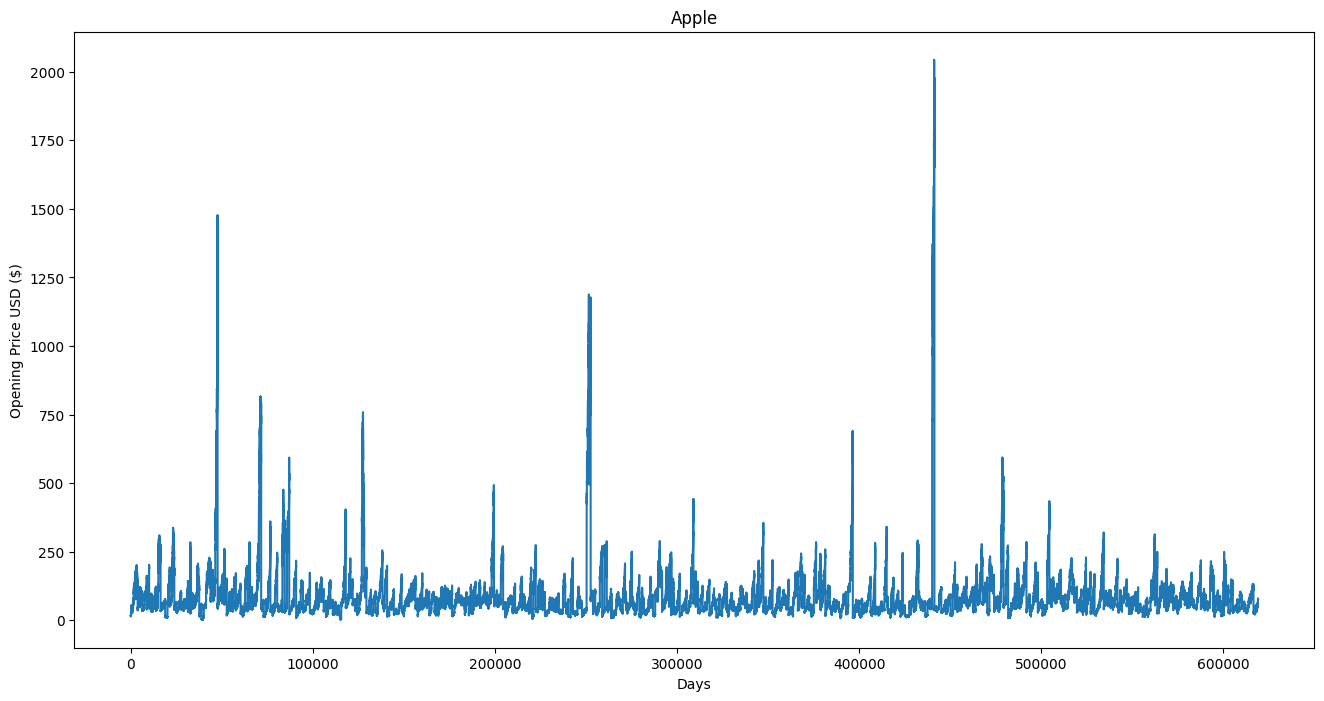

In [9]:
# Visualizing the opening prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['open'])
plt.show()

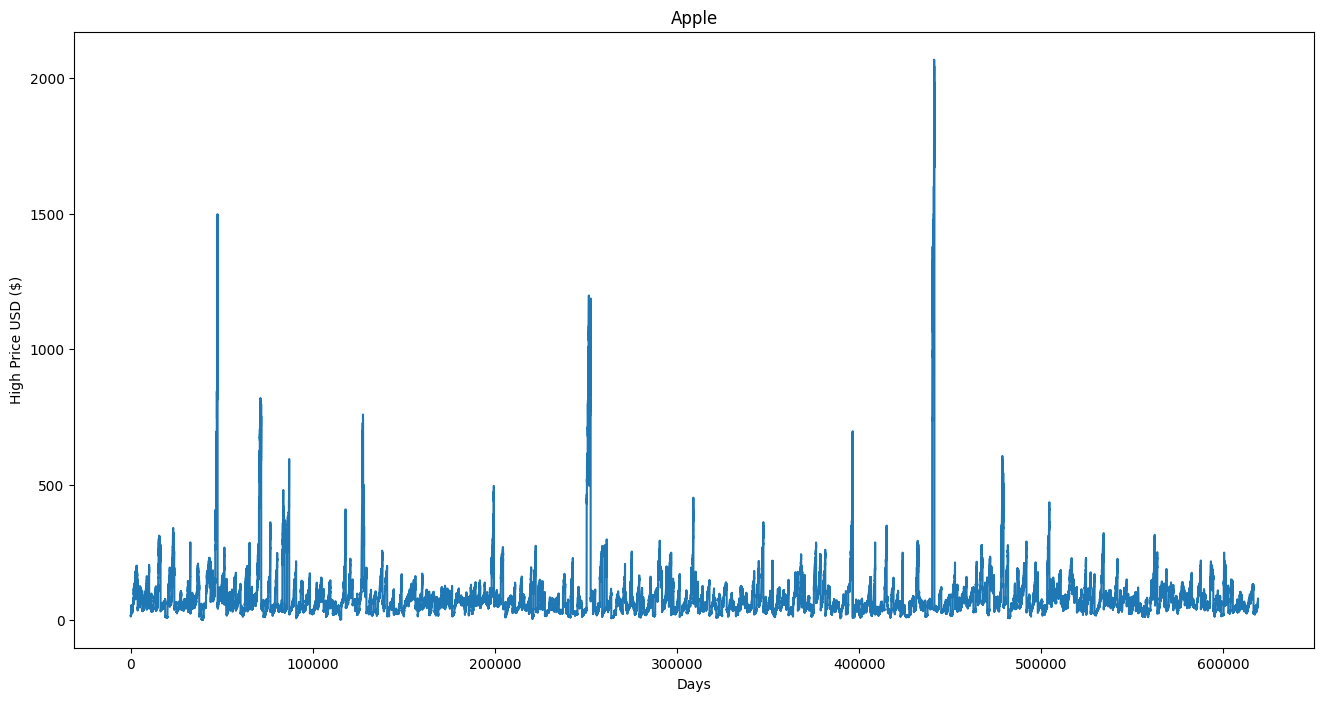

In [10]:
# Visualizing the high prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['high'])
plt.show()

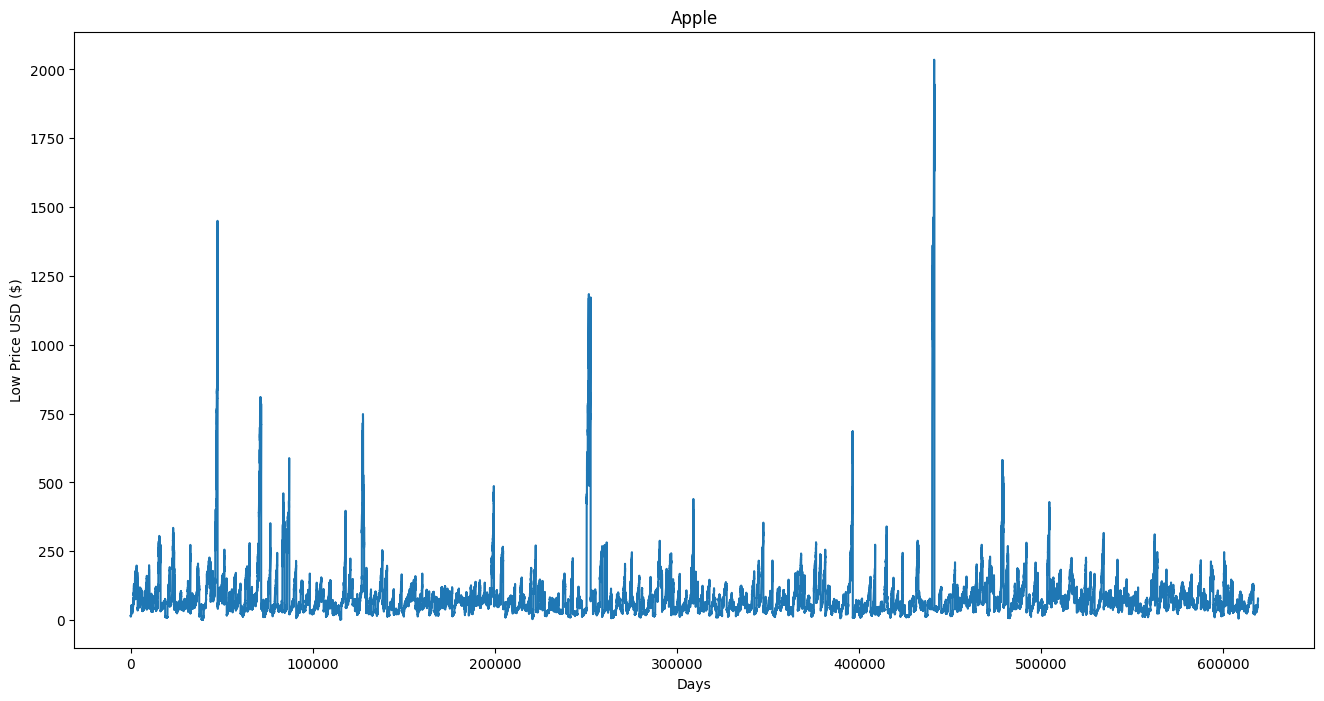

In [11]:


# Visualizing the low prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['low'])
plt.show()



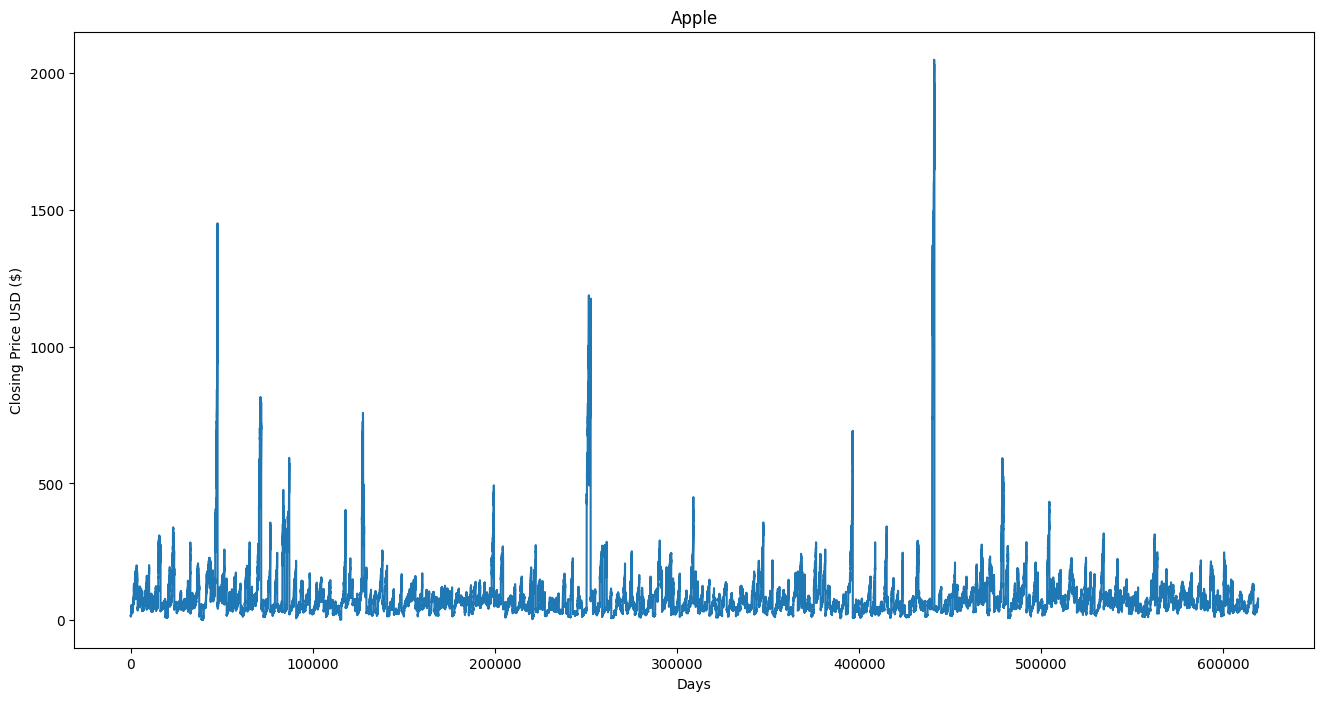

In [12]:


# Visualizing the closing prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['close'])
plt.show()



In [13]:
df2 = df['close']

In [14]:
df2.tail()

619035    77.82
619036    76.78
619037    73.83
619038    73.27
619039    73.86
Name: close, dtype: float64

In [15]:
df2 = pd.DataFrame(df2)

In [16]:
df2.tail()

,close
619035,77.82
619036,76.78
619037,73.83
619038,73.27
619039,73.86


In [17]:
# Prediction 100 days into the future.
future_days = 100
df2['Prediction'] = df2['close'].shift(-future_days)

In [18]:
df2.tail()

,close,Prediction
619035,77.82,NaN
619036,76.78,NaN
619037,73.83,NaN
619038,73.27,NaN
619039,73.86,NaN


In [19]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]
print(X)

[[14.75]
 [14.46]
 [14.27]
 ...
 [65.4 ]
 [65.28]
 [65.25]]


<ipython-input-19-5c69b61eae2a>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df2.drop(['Prediction'], 1))[:-future_days]


In [20]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[16.75 16.84 16.94 ... 73.83 73.27 73.86]



Linear and Decision Tree Regressio

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:


from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression



In [23]:


# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)



In [24]:


x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future



<ipython-input-24-f34d340b7e98>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df2.drop(['Prediction'], 1)[:-future_days]


array([[55.12],
       [55.57],
       [56.46],
       [56.11],
       [56.28],
       [56.47],
       [55.59],
       [58.87],
       [59.47],
       [58.81],
       [59.43],
       [59.9 ],
       [59.72],
       [59.88],
       [60.  ],
       [60.33],
       [59.73],
       [59.91],
       [60.31],
       [60.31],
       [61.43],
       [62.3 ],
       [62.58],
       [62.61],
       [62.26],
       [62.28],
       [62.64],
       [62.5 ],
       [62.67],
       [62.98],
       [63.26],
       [62.58],
       [62.59],
       [61.85],
       [61.96],
       [62.23],
       [62.39],
       [62.55],
       [63.03],
       [63.  ],
       [63.  ],
       [63.51],
       [62.78],
       [62.72],
       [62.76],
       [62.95],
       [62.5 ],
       [62.38],
       [62.67],
       [62.55],
       [61.79],
       [62.59],
       [62.47],
       [62.21],
       [62.56],
       [63.05],
       [63.35],
       [63.07],
       [62.46],
       [62.42],
       [62.75],
       [63.16],
       [

In [25]:


tree_prediction = tree.predict(x_future)
print(tree_prediction)



[60.8325641  59.08352941 57.13803922 57.24446809 59.17333333 60.67633333
 56.64478723 59.14682927 64.591875   62.29205882 57.66964286 62.03375
 63.4159     63.32480392 60.67655172 64.88375    60.41652174 62.91722222
 61.85230769 61.85230769 67.22151163 67.75611111 67.72080357 64.75722222
 68.1825     67.26205882 62.91305085 65.41337662 62.69482143 66.93652174
 66.20733333 67.72080357 64.868125   65.2314     68.708      64.18012821
 65.50583333 62.35441667 63.45413043 66.29408537 66.29408537 67.39163793
 66.2508     68.85       63.95933333 63.88990385 65.41337662 66.12276786
 62.69482143 62.35441667 62.37571429 64.868125   70.83069767 66.95409091
 65.76291667 68.8938     66.33068852 69.698      65.47019608 64.03803922
 66.95384615 63.73814815 68.26307692 65.56487593 62.5319697  65.17745455
 66.95409091 69.23696078 68.27698113 67.20083333 67.26205882 68.27698113
 68.94142857 60.67655172 61.68078431 63.369      60.41652174 62.4637037
 66.89529412 67.41208333 62.90927083 71.19806122 64.088

In [26]:


lr_prediction = lr.predict(x_future)
print(lr_prediction)



[58.1669525  58.56791804 59.36093879 59.0490767  59.20055257 59.36984913
 58.58573873 61.50833203 62.04295276 61.45486996 62.00731138 62.42609761
 62.2657114  62.40827692 62.51520107 62.80924247 62.27462174 62.43500796
 62.79142178 62.79142178 63.78938046 64.56458052 64.81407019 64.84080122
 64.52893913 64.54675983 64.86753226 64.74278743 64.8942633  65.17048401
 65.41997368 64.81407019 64.82298053 64.16361497 64.26162877 64.5022081
 64.64477363 64.78733915 65.21503573 65.1883047  65.1883047  65.64273231
 64.9922771  64.93881502 64.97445641 65.14375297 64.74278743 64.63586328
 64.8942633  64.78733915 64.1101529  64.82298053 64.71605639 64.48438741
 64.7962495  65.23285642 65.50016679 65.25067711 64.70714604 64.67150466
 64.96554606 65.33087022 65.44670471 63.65572528 64.35073223 64.3061805
 64.48438741 64.76060812 64.4041943  63.88739426 64.54675983 64.4041943
 64.14579428 62.51520107 63.23693905 62.28353209 62.27462174 63.17456663
 63.43296665 63.85175288 63.31713216 63.18347698 63.71

In [27]:


predictions = tree_prediction
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions



<ipython-input-27-d190dc3b89be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


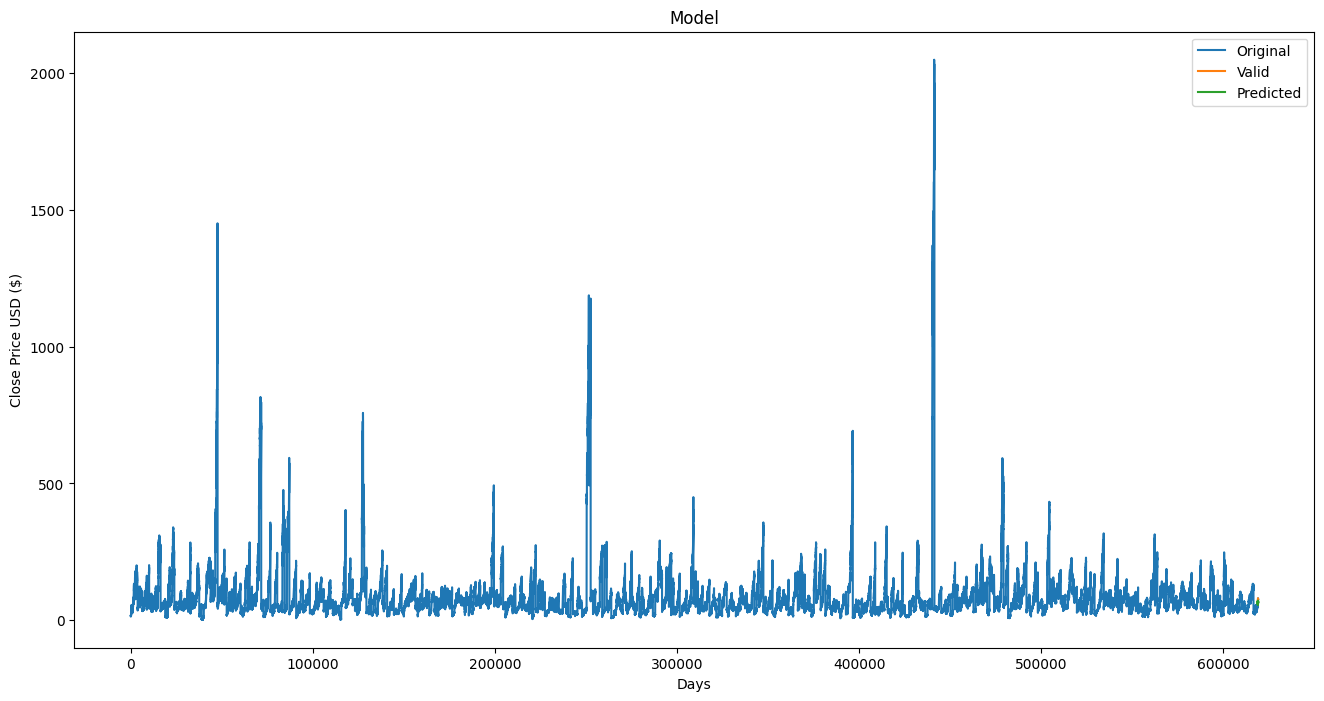

In [28]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()